In [1]:
from ondepi.applications import price_level as pl
from ondepi.visualisations import sample as plot_sample
from ondepi.resources import utils

In [2]:
symbol = 'INTC'
date = '2019-01-31'
price_level = 466000
direction = 1
std_size = 500
t0 = 1.05e3
t1 = 1.50e3
reset_time_origin = True

In [3]:
queue = pl.init_queue_on_lobster_data(
    symbol=symbol, date=date,
    price_level=price_level, direction=direction, std_size=std_size,
    t0=t0, t1=t1, reset_time_origin=reset_time_origin
)

symbol: INTC
date: 2019-01-31
direction: 1
price_level: 466000
std_size: 500
reset_time_origin: True


In [4]:
queue = pl.set_param(queue)

In [5]:
df_sample = queue.get_df_sample()

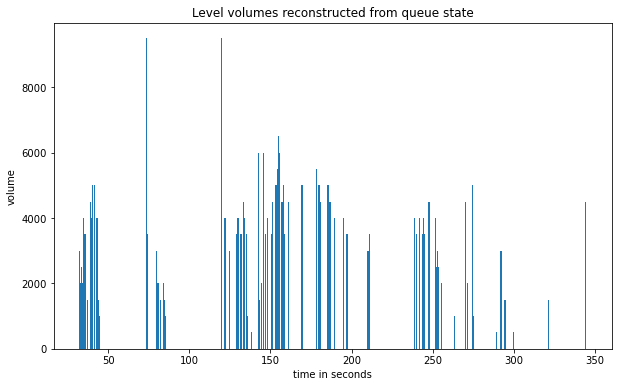

In [6]:
ax = plot_sample.plot_reconstructed_volumes(df_sample, std_size=std_size, time_range=None)

In [7]:
queue.simulate(max_time=1.0e3, max_events=1000, first_event=1, first_state=5)

In [8]:
df = queue.get_df_sample()

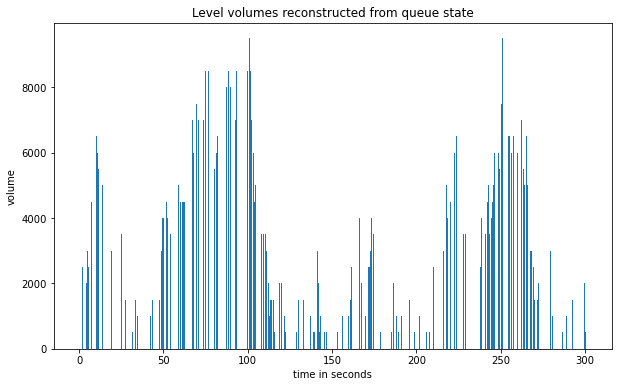

In [9]:
ax = plot_sample.plot_reconstructed_volumes(df, std_size=std_size, time_range=None, width=1.0e-1)

In [10]:
queue.filter(dt=7.5e-3, num_states=30)

In [11]:
df = pl.produce_df_detection(queue, beta=150.5)

In [12]:
df.describe()

,idx,time sample,time filter,state,expected val,variance,predictor,error,detector
count,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.494489e+06,149.448961,149.448961,6.632633,9.566171,44.404501,9.570289,-2.937657,-0.411587
std,8.798870e+05,87.988702,87.988702,5.003023,2.212730,13.959028,2.211132,5.115341,0.774999
min,0.000000e+00,0.000000,0.000000,0.000000,2.287846,0.000000,2.287846,-12.323403,-1.582786
25%,7.410485e+05,74.104898,74.104898,2.000000,8.538246,38.512413,8.546345,-7.058434,-1.057184
50%,1.453114e+06,145.311416,145.311416,6.000000,10.040639,47.309486,10.046392,-3.638618,-0.561778
75%,2.282546e+06,228.254708,228.254708,10.000000,10.949443,53.168520,10.949443,0.928199,0.184479
max,3.004196e+06,300.419676,300.419676,19.000000,13.828255,72.371515,13.828255,8.545189,1.935564


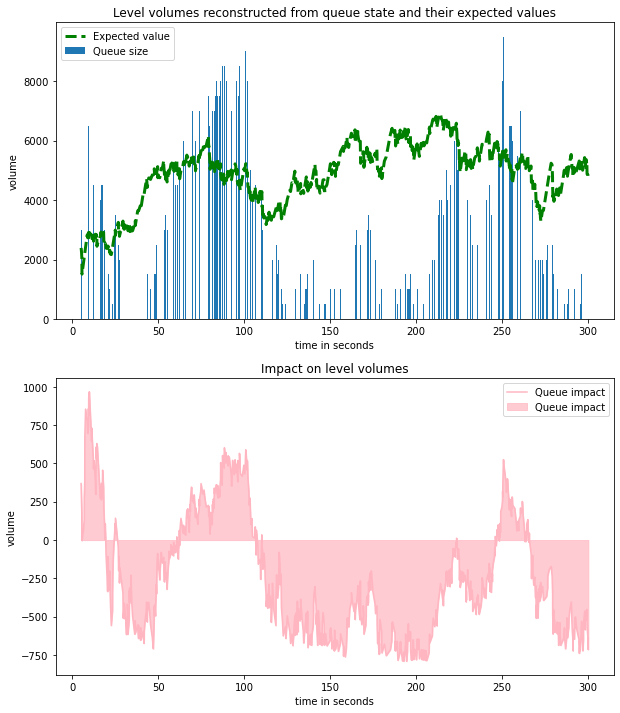

In [14]:
plot_sample.plot_detection_and_impact(df, time_range=(5, 500), std_size=std_size)